In [1]:
from qiskit import QuantumCircuit, QiskitError
#from qiskit import execute, BasicAer
import qiskit.ignis.verification.randomized_benchmarking as rb
#import qiskit.test.benchmarks.randomized_benchmarking as br
import pyzx
from pyzx.circuit.qasmparser import QASMParser
from pyzx.circuit.qiskitqasmparser import QiskitQASMParser

In [40]:
#qc = rb.randomized_benchmarking_seq()
qc = rb.randomized_benchmarking_seq(nseeds=1, length_vector=None,
                                rb_pattern=[[0,1]],
                                length_multiplier=1, seed_offset=0,
                                align_cliffs=False,
                                interleaved_gates=None,
                                is_purity=False)
qc = qc[0][0][0]
type(qc)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [41]:
# setting up the backend
# print(BasicAer.backends())

# running the job
# job_sim = execute(qc, BasicAer.get_backend('qasm_simulator'))
# sim_result = job_sim.result()

In [42]:
# print("\nPrint all gates:")
# [print(dat) for dat in qc.data]

In [43]:
qasm = qc.qasm()
print("\nPrint QASM:")
print(qasm)


Print QASM:
OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];
h qr[0];
h qr[1];
s qr[1];
x qr[0];
z qr[1];
barrier qr[0],qr[1];
z qr[1];
x qr[0];
sdg qr[1];
h qr[1];
h qr[0];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];



In [44]:
# Draw the circuit
print(qc)

         ┌───┐┌───┐      ░ ┌───┐ ┌───┐ ┌─┐        
qr_0: |0>┤ H ├┤ X ├──────░─┤ X ├─┤ H ├─┤M├────────
         ├───┤├───┤┌───┐ ░ ├───┤┌┴───┴┐└╥┘┌───┐┌─┐
qr_1: |0>┤ H ├┤ S ├┤ Z ├─░─┤ Z ├┤ Sdg ├─╫─┤ H ├┤M├
         └───┘└───┘└───┘ ░ └───┘└─────┘ ║ └───┘└╥┘
 cr_0: 0 ═══════════════════════════════╩═══════╬═
                                                ║ 
 cr_1: 0 ═══════════════════════════════════════╩═
                                                  


[Circuit(2 qubits, 5 gates), 'barrier qr[0],qr[1]', Circuit(2 qubits, 5 gates), 'measure qr[0] -> cr[0]', 'measure qr[1] -> cr[1]']
[0, 2]


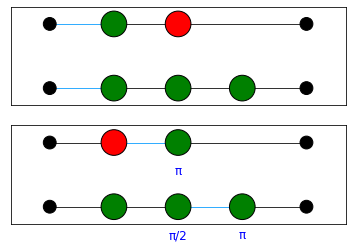

In [45]:
import matplotlib.pyplot as plt
#qasm = qc.decompose().qasm()
p = QiskitQASMParser()
circ_list, whichpyzx = p.qiskitparse(qasm)
print(circ_list)
print(whichpyzx)
pyzx.draw_many(circ_list, whichpyzx)


#print(circ_list)
#print(len(circ_list))
#print(whichpyzx)
# whichplt = 0
# for i in range(len(circ_list)):
#     if isinstance(circ_list[i], str):
#         pass
#     else:
#         circ_list[i].name = "pyzx_" + qc.name + "_" + str(i)
#         plt.axes(axs[whichplt])
#         fig = pyzx.draw(circ_list[i])
#         break
#plt.show()
#c.name = "pyzx_" + qc.name
#pyzx.draw(c)
#pyzx.draw(c.to_graph(), layout=None, labels=False, figsize=(16,4), h_edge_draw='blue', rows=None)

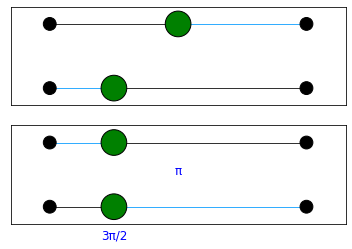

In [46]:
graph_list = [circ_list[w].to_graph() for w in whichpyzx]
[pyzx.full_reduce(g) for g in graph_list]
pyzx.draw_many(graph_list, range(len(whichpyzx)))

In [60]:
# pyzx.draw(graph_list[1])
# new_c = pyzx.extract.streaming_extract(graph_list[1])
# print(new_c.to_basic_gates().to_qasm())

pyzx_circ_list = [pyzx.extract.streaming_extract(g) for g in graph_list]
##new_c = c.from_graph(g)
pyzx_qasm = [new_c.to_basic_gates().to_qasm() for new_c in pyzx_circ_list]
for new_qasm in pyzx_qasm:
    [print(line) for line in new_qasm.splitlines()]
    print()

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];



In [ ]:
pqsl = [line + "\n" for line in pyzx_qasm.splitlines()]
qsl = [line + "\n" for line in qasm.splitlines()]
# print(pqsl)
# print(qsl)
new_qasm = ''.join(qsl[0:4]) + ''.join(pqsl[3:]) + ''.join(qsl[-2:])
new_qasm = new_qasm.replace('q[', 'qr[')
print(new_qasm)

In [ ]:
new_qc = qc.from_qasm_str(new_qasm)
print(new_qc)